In [1]:
import numpy  as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import tree
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [18]:
data=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")
data.head()
data.dropna()
data.drop_duplicates()
data["CCAvg"]=np.round(data["CCAvg"])

In [19]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [21]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.023932,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.053525,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.051496,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.636154,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.003318,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.108657,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.023932,-0.053525,-0.051496,0.636154,-0.003318,-0.108657,1.000000,-0.127719,0.108490,0.354803,0.013991,0.129497,-0.004251,-0.003835
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.127719,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.108490,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.354803,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [22]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [23]:
features=['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

In [24]:
rf_model=RandomForestClassifier()
rf_model.fit(X=data[features],y=data["Personal Loan"])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

ID 0.04075902594880607
Age 0.03511601136256793
Experience 0.03588192462960214
Income 0.32515023250754693
ZIP Code 0.035065182579730236
Family 0.10917966706394829
CCAvg 0.1380475598992536
Education 0.17244060210504003
Mortgage 0.03477269861997536
Securities Account 0.004300456195820007
CD Account 0.05384920943464589
Online 0.006985902803908472
CreditCard 0.008451526849155169


# <div class="burk">
# from above the main features are 
**1.INCOME
  2.Family
  3.CCAvg
  4.Education**</div><i class="fa fa-lightbulb-o "></i>

In [27]:
data1=data[["Income","Family","CCAvg","Education","CreditCard","CD Account"]]
data1.columns
data1.dropna()
data1.drop_duplicates()

,Income,Family,CCAvg,Education,CreditCard,CD Account
0,49,4,2.0,1,0,0
1,34,3,2.0,1,0,0
2,11,1,1.0,1,0,0
3,100,1,3.0,2,0,0
4,45,4,1.0,2,1,0
...,...,...,...,...,...,...
4993,218,2,7.0,1,0,0
4994,75,3,2.0,3,0,0
4996,15,4,0.0,1,0,0
4998,49,3,0.0,2,0,0


In [28]:
features2=['Income', 'Family', 'CCAvg', 'Education',"CreditCard","CD Account"]
X=data1[features2]
y=data["Personal Loan"]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [30]:
model=tree.DecisionTreeClassifier(max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
with open("bankloan.dot","w") as f:
    f=tree.export_graphviz(model,feature_names=features2,out_file=f);
model.score(X=pd.DataFrame(data1[features2]),y=data["Personal Loan"])

0.987

In [32]:
model.score(X=pd.DataFrame(x_train),y=y_train)

0.991

In [33]:
ypred=model.predict(x_test)
ypred
x=pd.Series(ypred)
count=0
for i in y_test:
    if i==1:
        count=count+1
print(count)

205


In [34]:
ypred=model.predict(x_test)
ypred
x=pd.Series(ypred)
count=0
for i in x:
    if i==1:
        count=count+1
print(count)

193


In [35]:
accuracy_score(y_test, ypred)

0.981

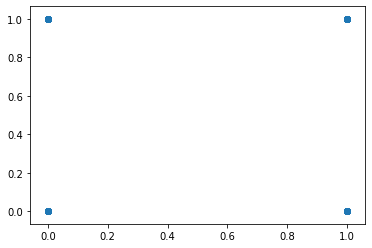

In [16]:
plt.scatter(ypred,y_test)

ModuleNotFoundError: No module named 'rattle'

SyntaxError: invalid syntax (<ipython-input-38-a6c201d009ea>, line 2)